In [1]:
pip install geopandas rasterio matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
points = [
    Point(625466, 5621289),
    Point(626082, 5621627),
    Point(627116, 5621680),
    Point(625095, 5622358),
]
gdf = geopandas.GeoDataFrame([1, 2, 3, 4], geometry=points, crs=32630)

In [8]:
src = rasterio.open('s2a_l2a_fishbourne.tif')

<Axes: >

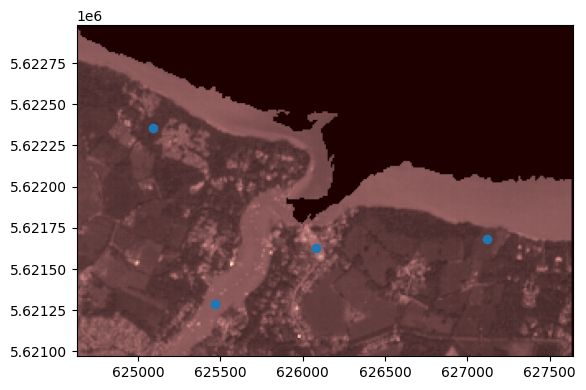

In [9]:
from rasterio.plot import show

fig, ax = plt.subplots()

extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")

gdf.plot(ax=ax)

In [11]:
coord_list = [(x, y) for x, y in zip(gdf["geometry"].x, gdf["geometry"].y)]

In [12]:
gdf["value"] = [x for x in src.sample(coord_list)]
gdf.head()

,0,geometry,value
0,1,POINT (625466.000 5621289.000),"[684.0, 1005.0, 707.0, 265.0]"
1,2,POINT (626082.000 5621627.000),"[999.0, 1105.0, 1115.0, 1340.0]"
2,3,POINT (627116.000 5621680.000),"[284.0, 713.0, 310.0, 5405.0]"
3,4,POINT (625095.000 5622358.000),"[237.0, 564.0, 250.0, 3680.0]"
